DO NOT RUN AS IT TAKES VERY LONG

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime

start = '2012-01-01'
end = '2019-12-31'
symbols = ['AAPL',
          'ABBV',
          'ADBE',
          'AMD',
          'AMZN',
          'AVGO',
          'BAC',
          'COST',
          'CRM',
          'CVX',
          'DIS',
          'GE',
          'GOOG',
          'GOOGL',
          'HD',
          'JNJ',
          'JPM',
          'KO',
          'LIN',
          'LLY',
          'MA',
          'META',
          'MRK',
          'MSFT',
          'NFLX',
          'NVDA',
          'ORCL',
          'PEP',
          'PG',
          'TMO',
          'TSLA',
          'UNH',
          'V',
          'WFC',
          'WMT',
          'XOM']

stock_prices = yf.download(symbols, start=start, end=end)
#stock_prices.to_csv("sp500_stock_prices.csv", index =None)

[*********************100%%**********************]  36 of 36 completed


In [2]:
stock_prices=stock_prices['Adj Close']

In [3]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2011 non-null   float64
 1   ABBV    1761 non-null   float64
 2   ADBE    2011 non-null   float64
 3   AMD     2011 non-null   float64
 4   AMZN    2011 non-null   float64
 5   AVGO    2011 non-null   float64
 6   BAC     2011 non-null   float64
 7   COST    2011 non-null   float64
 8   CRM     2011 non-null   float64
 9   CVX     2011 non-null   float64
 10  DIS     2011 non-null   float64
 11  GE      2011 non-null   float64
 12  GOOG    2011 non-null   float64
 13  GOOGL   2011 non-null   float64
 14  HD      2011 non-null   float64
 15  JNJ     2011 non-null   float64
 16  JPM     2011 non-null   float64
 17  KO      2011 non-null   float64
 18  LIN     2011 non-null   float64
 19  LLY     2011 non-null   float64
 20  MA      2011 non-null   float64
 21  META    1916 non-nu

In [4]:
stock_prices.dropna(axis=0,inplace=True)

In [5]:
print(type(stock_prices.columns))
print(stock_prices.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['AAPL', 'ABBV', 'ADBE', 'AMD', 'AMZN', 'AVGO', 'BAC', 'COST', 'CRM',
       'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LIN',
       'LLY', 'MA', 'META', 'MRK', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'PEP', 'PG',
       'TMO', 'TSLA', 'UNH', 'V', 'WFC', 'WMT', 'XOM'],
      dtype='object', name='Ticker')


In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Normalize the time series data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
data_scaled = scaler.fit_transform(stock_prices.T.values[..., np.newaxis])

# Check the shape and data
print(data_scaled.shape)
print(data_scaled[:5])


(36, 1761, 1)
[[[-1.10512152]
  [-1.12157425]
  [-1.15742408]
  ...
  [ 3.08003956]
  [ 3.07795649]
  [ 3.1105202 ]]

 [[-1.70664958]
  [-1.71813758]
  [-1.73556894]
  ...
  [ 1.56505829]
  [ 1.53235475]
  [ 1.49705662]]

 [[-1.1622357 ]
  [-1.16928082]
  [-1.16474327]
  ...
  [ 2.33476796]
  [ 2.32987216]
  [ 2.30061688]]

 [[-0.80615202]
  [-0.81016052]
  [-0.80013926]
  ...
  [ 3.61322675]
  [ 3.56813098]
  [ 3.50199063]]

 [[-1.08969788]
  [-1.08766912]
  [-1.08650732]
  ...
  [ 1.70457345]
  [ 1.70635941]
  [ 1.66663347]]]


In [62]:
inertias = []
max_clusters = 10  # You can adjust this value based on your dataset size and computational power

for k in range(1, max_clusters + 1):
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", verbose=True, random_state=42)
    model.fit(data_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

294.417 --> 51.052 --> 50.984 --> 50.984 --> 50.984 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s


147.390 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


30.749 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


30.748 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


30.748 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


81.976 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


26.684 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s


26.223 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s


26.091 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s


26.091 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s


69.545 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s


23.836 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s


23.742 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s


23.742 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s


41.881 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s


11.535 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s


11.442 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s


11.442 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.3s


35.540 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.8s


10.379 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.6s


10.277 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.8s


10.277 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.2s


30.563 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   16.2s


9.506 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.0s


9.482 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.1s


9.482 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   13.9s


9.482 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   12.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   16.1s


26.245 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   15.7s


8.549 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.9s


8.190 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.3s


8.190 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.6s


20.549 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.5s


6.875 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.4s


6.515 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.7s


6.515 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.7s


16.156 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.6s


5.910 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.4s


5.550 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.2s


5.550 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.8s


NameError: name 'plt' is not defined

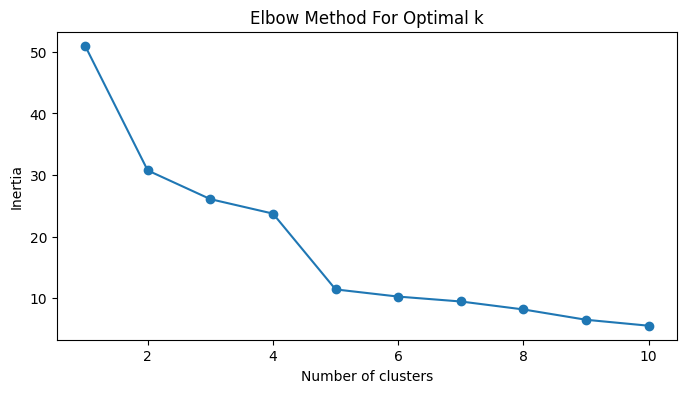

In [64]:
import matplotlib.pyplot  as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
from tslearn.clustering import TimeSeriesKMeans

# Define the number of clusters
n_clusters = 3

# Create a K-means model with DTW
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
labels = model.fit_predict(data_scaled)

# Print the cluster labels
print(labels)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s


81.976 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s


26.684 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s


26.223 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s


26.091 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s


26.091 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s


[2 2 0 0 2 2 2 0 0 0 0 1 2 2 2 2 2 0 0 0 0 2 0 0 2 2 2 0 0 0 2 2 0 2 0 1]


In [13]:
print(len(stock_prices.columns))  # Number of stocks
print(len(labels))               # Number of labels returned from the clustering

36
36


In [14]:
import pandas as pd

# Assuming 'stock_prices.columns' contains the stock tickers
stock_labels = pd.DataFrame({
    'Stock': stock_prices.columns,
    'Cluster': labels
})

print(stock_labels)

    Stock  Cluster
0    AAPL        2
1    ABBV        2
2    ADBE        0
3     AMD        0
4    AMZN        2
5    AVGO        2
6     BAC        2
7    COST        0
8     CRM        0
9     CVX        0
10    DIS        0
11     GE        1
12   GOOG        2
13  GOOGL        2
14     HD        2
15    JNJ        2
16    JPM        2
17     KO        0
18    LIN        0
19    LLY        0
20     MA        0
21   META        2
22    MRK        0
23   MSFT        0
24   NFLX        2
25   NVDA        2
26   ORCL        2
27    PEP        0
28     PG        0
29    TMO        0
30   TSLA        2
31    UNH        2
32      V        0
33    WFC        2
34    WMT        0
35    XOM        1


In [17]:
# Group stocks by cluster and list them
clustered_stocks = stock_labels.groupby('Cluster')['Stock'].apply(list)
print('Cluster 1:',clustered_stocks[0])
print('Cluster 2:',clustered_stocks[1])
print('Cluster 3:',clustered_stocks[2])

Cluster 1: ['ADBE', 'AMD', 'COST', 'CRM', 'CVX', 'DIS', 'KO', 'LIN', 'LLY', 'MA', 'MRK', 'MSFT', 'PEP', 'PG', 'TMO', 'V', 'WMT']
Cluster 2: ['GE', 'XOM']
Cluster 3: ['AAPL', 'ABBV', 'AMZN', 'AVGO', 'BAC', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'META', 'NFLX', 'NVDA', 'ORCL', 'TSLA', 'UNH', 'WFC']


Cluster 1: ['ADBE', 'AMD', 'COST', 'CRM', 'CVX', 'DIS', 'KO', 'LIN', 'LLY', 'MA', 'MRK', 'MSFT', 'PEP', 'PG', 'TMO', 'V', 'WMT']

Cluster 2: ['GE', 'XOM']

Cluster 3: ['AAPL', 'ABBV', 'AMZN', 'AVGO', 'BAC', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'META', 'NFLX', 'NVDA', 'ORCL', 'TSLA', 'UNH', 'WFC']